> Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem. Which is our major project's objective is too.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
os.listdir("/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training")

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training"
test_dir = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing"
gli = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/glioma_tumor"
menin = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/meningioma_tumor"
no = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/no_tumor"
pit = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/pituitary_tumor"

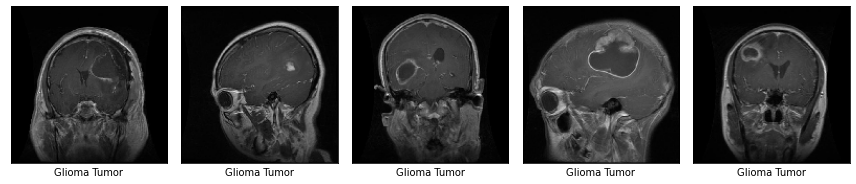

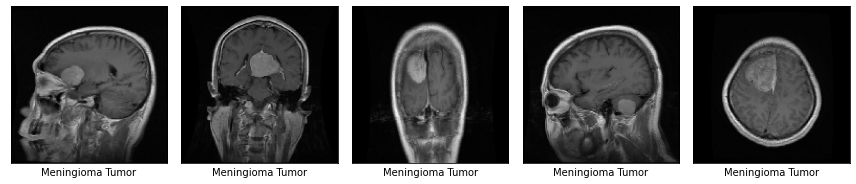

In [ ]:
plt.figure(figsize=(12,6))
gli_samp = random.sample(os.listdir(gli),5)

for i,image in enumerate(gli_samp):
    path = os.path.join(gli,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Glioma Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

plt.figure(figsize=(12,6))
menin_samp = random.sample(os.listdir(menin),5)

for i,image in enumerate(menin_samp):
    path = os.path.join(menin,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Meningioma Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();
#plt.show()

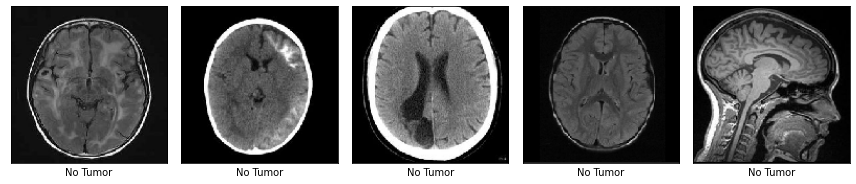

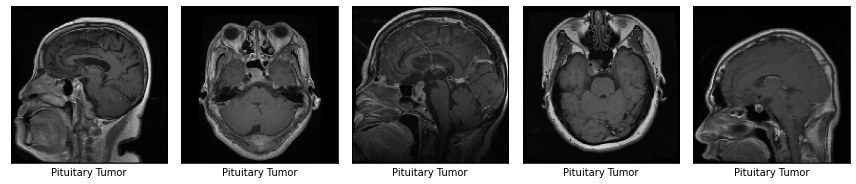

In [ ]:
plt.figure(figsize=(12,6))
no_samp = random.sample(os.listdir(no),5)

for i,image in enumerate(no_samp):
    path = os.path.join(no,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("No Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

plt.figure(figsize=(12,6))
pit_samp = random.sample(os.listdir(pit),5)

for i,image in enumerate(pit_samp):
    path = os.path.join(pit,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Pituitary Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();
#plt.show()

In [ ]:
train_dir = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training"
test_dir = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing"
gli = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/glioma_tumor"
menin = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/meningioma_tumor"
no = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/no_tumor"
pit = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training/pituitary_tumor"

x = []
y = []

for i in tqdm(os.listdir(gli)):
    path = os.path.join(gli,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Glioma')
    
for i in tqdm(os.listdir(menin)):
    path = os.path.join(menin,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Meningioma')
    

for i in tqdm(os.listdir(no)):
    path = os.path.join(no,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No')   
    
for i in tqdm(os.listdir(pit)):
    path = os.path.join(pit,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Pituitary')

100%|██████████| 833/833 [04:44<00:00,  2.93it/s]


In [ ]:
train_dir = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Training"
test_dir = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing"
gli = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing/meningioma_tumor"
menin = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing/meningioma_tumor"
no = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing/no_tumor"
pit = "/content/drive/MyDrive/Datasets/BrainTumor /brain tumor 1/Testing/pituitary_tumor"


for i in tqdm(os.listdir(gli)):
    path = os.path.join(gli,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Glioma')
    
for i in tqdm(os.listdir(menin)):
    path = os.path.join(menin,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Meningioma')
    

for i in tqdm(os.listdir(no)):
    path = os.path.join(no,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No')   
    
for i in tqdm(os.listdir(pit)):
    path = os.path.join(pit,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Pituitary')

100%|██████████| 74/74 [00:21<00:00,  3.46it/s]


In [ ]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((3285, 224, 224, 3), (3285,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


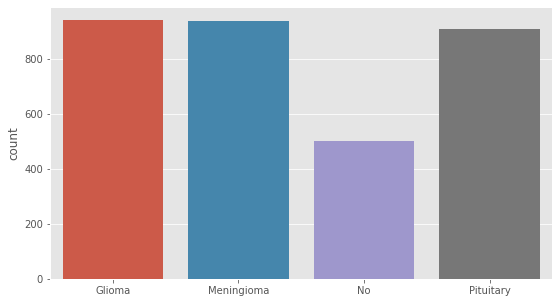

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

In [ ]:
y

array(['Glioma', 'Glioma', 'Glioma', ..., 'Pituitary', 'Pituitary',
       'Pituitary'], dtype='<U10')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
unique,counts = np.unique(y,return_counts=True)
print(unique,counts)

[0 1 2 3] [941 937 500 907]


In [ ]:
y = to_categorical(y)#num_classes = 4
y.shape

(3285, 4)

In [ ]:
from sklearn.utils import shuffle
x,y = shuffle(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(657, 4)

**Image Augmentation**

In [ ]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 2876 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


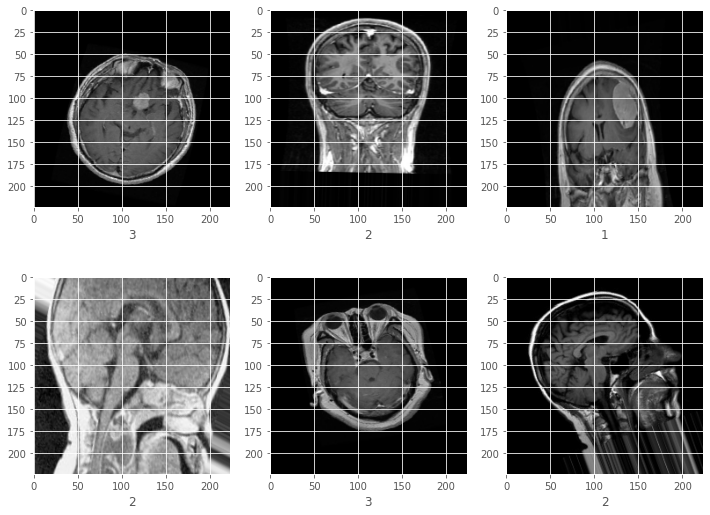

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

### Model Building & Training:

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

ModuleNotFoundError: ignored

In [ ]:
#from tensorflow.keras.applications import InceptionV3
#inception = InceptionV3(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
model = inception.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = inception.input,outputs = model)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("inception_braintumor.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
import time
start_time = time.time()
history = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/15
83/83 [==============================] - 24s 186ms/step - loss: 0.8653 - accuracy: 0.6419 - val_loss: 0.6814 - val_accuracy: 0.7443

Epoch 00001: val_accuracy improved from -inf to 0.74429, saving model to inception_braintumor.h5
Epoch 2/15
83/83 [==============================] - 13s 156ms/step - loss: 0.2168 - accuracy: 0.9087 - val_loss: 0.2604 - val_accuracy: 0.9102

Epoch 00002: val_accuracy improved from 0.74429 to 0.91020, saving model to inception_braintumor.h5
Epoch 3/15
83/83 [==============================] - 13s 157ms/step - loss: 0.1239 - accuracy: 0.9449 - val_loss: 0.2505 - val_accuracy: 0.9269

Epoch 00003: val_accuracy improved from 0.91020 to 0.92694, saving model to inception_braintumor.h5
Epoch 4/15
83/83 [==============================] - 13s 157ms/step - loss: 0.1285 - accuracy: 0.9415 - val_loss: 0.3411 - val_accuracy: 0.8645

Epoch 00004: val_accuracy did not improve from 0.92694
Epoch 5

In [ ]:
model.save('inception_braintumor.h5')
model.save_weights('inception_braintumor_weights.hdf5')
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)
writer = pd.ExcelWriter('output_inception_braintumor.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()

    epoch_id      loss  accuracy  val_loss  val_accuracy
0          1  0.602431  0.769026  0.681360      0.744292
1          2  0.211799  0.913242  0.260439      0.910198
2          3  0.125122  0.943683  0.250491      0.926941
3          4  0.137017  0.935693  0.341124      0.864536
4          5  0.141292  0.933029  0.323087      0.898021
5          6  0.090231  0.958524  0.234525      0.928463
6          7  0.077717  0.958524  0.240374      0.931507
7          8  0.079509  0.959285  0.255195      0.931507
8          9  0.087464  0.956240  0.236124      0.931507
9         10  0.073736  0.960807  0.249297      0.926941
10        11  0.075821  0.960807  0.263210      0.928463
11        12  0.071773  0.961948  0.263601      0.928463


In [ ]:
from tensorflow.keras.applications import Xception
xception = Xception(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
model = xception.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = xception.input,outputs = model)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("xception_braintumor.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
import time
start_time = time.time()
history = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

Epoch 1/15
83/83 [==============================] - 46s 417ms/step - loss: 0.9152 - accuracy: 0.6279 - val_loss: 0.6964 - val_accuracy: 0.7154

Epoch 00001: val_accuracy improved from -inf to 0.71537, saving model to xception_braintumor.h5
Epoch 2/15
83/83 [==============================] - 33s 397ms/step - loss: 0.2245 - accuracy: 0.9186 - val_loss: 0.2840 - val_accuracy: 0.9072

Epoch 00002: val_accuracy improved from 0.71537 to 0.90715, saving model to xception_braintumor.h5
Epoch 3/15
83/83 [==============================] - 33s 397ms/step - loss: 0.1302 - accuracy: 0.9490 - val_loss: 0.2459 - val_accuracy: 0.9300

Epoch 00003: val_accuracy improved from 0.90715 to 0.92998, saving model to xception_braintumor.h5
Epoch 4/15
83/83 [==============================] - 33s 397ms/step - loss: 0.0999 - accuracy: 0.9524 - val_loss: 0.3338 - val_accuracy: 0.9300

Epoch 00004: val_accuracy did not improve from 0.92998
Epoch 5/15
83/83 [==============================] - 33s 397ms/step - loss: 

In [ ]:
model.save('xception_braintumor.h5')
model.save_weights('xception_braintumor_weights.hdf5')
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)
writer = pd.ExcelWriter('output_XCeption_braintumor.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()

   epoch_id      loss  accuracy  val_loss  val_accuracy
0         1  0.644816  0.758752  0.696415      0.715373
1         2  0.213391  0.919330  0.284011      0.907154
2         3  0.122401  0.948250  0.245890      0.929985
3         4  0.100948  0.949772  0.333833      0.929985
4         5  0.096678  0.957763  0.253739      0.919330
5         6  0.078873  0.966134  0.278620      0.919330
6         7  0.080864  0.960807  0.306923      0.922374
7         8  0.074642  0.962709  0.307396      0.919330


In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
model = vgg16.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg16.input,outputs = model)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("vgg16_braintumor.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
import time
start_time = time.time()
history1 = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/15
83/83 [==============================] - 22s 235ms/step - loss: 1.8905 - accuracy: 0.3219 - val_loss: 1.2704 - val_accuracy: 0.4505

Epoch 00001: val_accuracy improved from -inf to 0.45053, saving model to vgg16_braintumor.h5
Epoch 2/15
83/83 [==============================] - 18s 215ms/step - loss: 1.2247 - accuracy: 0.4058 - val_loss: 1.3534 - val_accuracy: 0.4521

Epoch 00002: val_accuracy improved from 0.45053 to 0.45205, saving model to vgg16_braintumor.h5
Epoch 3/15
83/83 [==============================] - 18s 215ms/step - loss: 1.0791 - accuracy: 0.5227 - val_loss: 1.0314 - val_accuracy: 0.5221

Epoch 00003: val_accuracy improved from 0.45205 to 0.52207, saving model to vgg16_braintumor.h5
Epoch 4/15
83/83 [==============================] - 18s 215ms/step - loss: 0.9834 - accuracy: 0.5756 - val_loss: 0.6354 - val_accuracy: 0.7686

Epoch 00004: val_accuracy improved from 0.52207 to 0.76865, saving model t

In [ ]:
model.save('vgg16_braintumor.h5')
model.save_weights('vgg16_braintumor_weights.hdf5')
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)
writer = pd.ExcelWriter('output_vgg16_braintumor.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()

    epoch_id      loss  accuracy  val_loss  val_accuracy
0          1  0.602431  0.769026  0.681360      0.744292
1          2  0.211799  0.913242  0.260439      0.910198
2          3  0.125122  0.943683  0.250491      0.926941
3          4  0.137017  0.935693  0.341124      0.864536
4          5  0.141292  0.933029  0.323087      0.898021
5          6  0.090231  0.958524  0.234525      0.928463
6          7  0.077717  0.958524  0.240374      0.931507
7          8  0.079509  0.959285  0.255195      0.931507
8          9  0.087464  0.956240  0.236124      0.931507
9         10  0.073736  0.960807  0.249297      0.926941
10        11  0.075821  0.960807  0.263210      0.928463
11        12  0.071773  0.961948  0.263601      0.928463


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = effnet.input,outputs = model)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("effnet_braintumor.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
import time
start_time = time.time()
history1 = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/15
83/83 [==============================] - 31s 245ms/step - loss: 1.0640 - accuracy: 0.5678 - val_loss: 0.8753 - val_accuracy: 0.6301

Epoch 00001: val_accuracy improved from -inf to 0.63014, saving model to effnet_braintumor.h5
Epoch 2/15
83/83 [==============================] - 18s 219ms/step - loss: 0.3972 - accuracy: 0.8575 - val_loss: 0.6543 - val_accuracy: 0.7260

Epoch 00002: val_accuracy improved from 0.63014 to 0.72603, saving model to effnet_braintumor.h5
Epoch 3/15
83/83 [==============================] - 18s 218ms/step - loss: 0.2657 - accuracy: 0.9087 - val_loss: 0.6526 - val_accuracy: 0.7412

Epoch 00003: val_accuracy improved from 0.72603 to 0.74125, saving model to effnet_braintumor.h5
Epoch 4/15
83/83 [==============================] - 18s 218ms/step - loss: 0.1781 - accuracy: 0.9407 - val_loss: 0.7789 - val_accuracy: 0.6986

Epoch 00004: val_accuracy did not improve from 0.74125
Epoch 5/15
83/83

In [ ]:
model.save('effnet_braintumor.h5')
model.save_weights('effnet_braintumor_weights.hdf5')
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)
writer = pd.ExcelWriter('output_effnet_braintumor.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()

    epoch_id      loss  accuracy  val_loss  val_accuracy
0          1  0.602431  0.769026  0.681360      0.744292
1          2  0.211799  0.913242  0.260439      0.910198
2          3  0.125122  0.943683  0.250491      0.926941
3          4  0.137017  0.935693  0.341124      0.864536
4          5  0.141292  0.933029  0.323087      0.898021
5          6  0.090231  0.958524  0.234525      0.928463
6          7  0.077717  0.958524  0.240374      0.931507
7          8  0.079509  0.959285  0.255195      0.931507
8          9  0.087464  0.956240  0.236124      0.931507
9         10  0.073736  0.960807  0.249297      0.926941
10        11  0.075821  0.960807  0.263210      0.928463
11        12  0.071773  0.961948  0.263601      0.928463


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
model = vgg19.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = vgg19.input,outputs = model)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("vgg19_braintumor.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
import time
start_time = time.time()
history1 = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

Epoch 1/15
83/83 [==============================] - 43s 505ms/step - loss: 1.8167 - accuracy: 0.3058 - val_loss: 1.2698 - val_accuracy: 0.3988

Epoch 00001: val_accuracy improved from -inf to 0.39878, saving model to vgg19_braintumor.h5
Epoch 2/15
83/83 [==============================] - 41s 500ms/step - loss: 1.2753 - accuracy: 0.3957 - val_loss: 1.2611 - val_accuracy: 0.4125

Epoch 00002: val_accuracy improved from 0.39878 to 0.41248, saving model to vgg19_braintumor.h5
Epoch 3/15
83/83 [==============================] - 42s 501ms/step - loss: 1.2000 - accuracy: 0.4416 - val_loss: 1.0183 - val_accuracy: 0.5647

Epoch 00003: val_accuracy improved from 0.41248 to 0.56469, saving model to vgg19_braintumor.h5
Epoch 4/15
83/83 [==============================] - 42s 502ms/step - loss: 1.0997 - accuracy: 0.5118 - val_loss: 0.8697 - val_accuracy: 0.6347

Epoch 00004: val_accuracy improved from 0.56469 to 0.63470, saving model to vgg19_braintumor.h5
Epoch 5/15
83/83 [=========================

In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
resnet = ResNet50(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
model = resnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = resnet.input,outputs = model)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("resnet_braintumor.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)
import time
start_time = time.time()
history = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/15
83/83 [==============================] - 23s 199ms/step - loss: 0.8416 - accuracy: 0.6747 - val_loss: 1.0366 - val_accuracy: 0.6925

Epoch 00001: val_accuracy improved from -inf to 0.69254, saving model to resnet_braintumor.h5
Epoch 2/15
83/83 [==============================] - 15s 180ms/step - loss: 0.2365 - accuracy: 0.9083 - val_loss: 0.2725 - val_accuracy: 0.9087

Epoch 00002: val_accuracy improved from 0.69254 to 0.90868, saving model to resnet_braintumor.h5
Epoch 3/15
83/83 [==============================] - 15s 180ms/step - loss: 0.1384 - accuracy: 0.9425 - val_loss: 0.3399 - val_accuracy: 0.8676

Epoch 00003: val_accuracy did not improve from 0.90868
Epoch 4/15
83/83 [==============================] - 15s 180ms/step - loss: 0.1720 - accuracy: 0.9277 - val_loss: 0.5553 - val_accuracy: 0.8158

Epoch 00004: val_accuracy did not improve from 0.90868

Epoch 00004: ReduceLROnPlateau reducing learning rate to 

In [ ]:
model.save('resnet50_braintumor.h5')
model.save_weights('resnet50_braintumor_weights.hdf5')
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)
writer = pd.ExcelWriter('output_resnet50_braintumor.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()

    epoch_id      loss  accuracy  val_loss  val_accuracy
0          1  0.563149  0.786530  1.036617      0.692542
1          2  0.219432  0.907154  0.272458      0.908676
2          3  0.140336  0.939117  0.339903      0.867580
3          4  0.175844  0.929224  0.555317      0.815830
4          5  0.103420  0.950533  0.221231      0.929985
5          6  0.086417  0.956621  0.195009      0.942161
6          7  0.090870  0.953196  0.198975      0.926941
7          8  0.082862  0.959285  0.229289      0.926941
8          9  0.076041  0.963470  0.237993      0.931507
9         10  0.074795  0.958904  0.231183      0.931507
10        11  0.072623  0.962709  0.241639      0.931507


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

''''model = Sequential()
model.add(effnet)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4,activation = "softmax"))'''

model = vgg19.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = effnet.input,outputs = model)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

In [ ]:
#history = model.fit_generator(generator = train_gen,epochs=15,validation_data = test_gen,verbose=1,
                              #callbacks=[checkpoint,earlystop,reduce_lr])
import time
start_time = time.time()
history = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])
end_time = time.time()
print(end_time - start_time)

In [ ]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

### Learning Curve:

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
y_pred= model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

In [ ]:
y_test_new = np.argmax(y_test,axis=1)

### Classification Report:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

### Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7)
,class_names = ['Glioma','Meningioma','No','Pituitary'],show_normed=True);
                     
                     

### Model Performance:

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()
    
    

In [ ]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df['epoch_id'] = [i for i in range (1,len(hist_df)+1)]
hist_df=hist_df.reindex(columns= ['epoch_id', 'loss', 'accuracy','val_loss','val_accuracy'])
print(hist_df)
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
hist_df.to_excel(writer)
# save the excel
writer.save()